<a href="https://colab.research.google.com/github/venegaso/AnalisisPrecio/blob/main/AnalisisPrecioAguacate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyecto aplicado - Introducción a Machine Learning**
Análisis de datos del precio del aguacate en Estados Unidos

#**1 - Entendimiento del negocio:**
##**1.1 - Objetivos de negocio:**
El comercio de aguacate hass en Estados Unidos va creciendo con el transcurrir de los años. En la actualidad este país importa casi el 90% del aguacate que se consume, abarcando el 40% del total de importaciones a nivel mundial. Viendo el panorama de esta manera es posible que el consumo de aguacate se mantenga e incluso se incremente.

Este negocio es importante para el comercio estadounidense por lo cual se recolectan datos que pueden ser importantes para varios sectores, negocios u posibles inversionistas, entre otros.

##**1.2 - Metas del Proyecto de machine learning:**
*   Realizar un modelo para la predicción del precio del aguacate por medio de Machine Learning (Inteligencia artificial), generando una posible herramienta con información que pueda generar un beneficio tanto para los comerciantes como para los inversionistas.



#**2 - Entendimiento de los datos**

##**2.1 - Recolección inicial de los datos**
La información inicial tomada de la pagina de Kaggle y esta misma del website Hass Avocado Board. Los datos son compilados en un archivo CSV 

##**2.2 - Descripción de los datos**
La siguiente data contiene las siguientes caracteristicas:

*   Date: Fecha de observacion
*   AveragePrice: El precio promedio de cada palta
*   Total Volume:El volumen total comprado
*   4046: El numero total de paltas con codigo PLU 4046
*   4225: El numero total de paltas con codigo PLU 4225 sold
*   4770: El numero total de paltas con codigo PLU 4770 sold
*   Total Bags: El numero total de bolsas vendidas
*   Small Bags: El numero total de bolsas pequeñas
*   Large Bags: El numero total de bolsas grandes
*   XLarge Bags: El numero total de bolsas extra grandes
*   type: El tipo (convencional o organico)
*   year: Año
*   region: La ciudad o region observada




##**2.3 - Exploración de los datos**

In [ ]:
#Importación de la libreria scikit-learn
!pip install -U scikit-learn
import sklearn
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importación de librerias necesarias para el proceso y analisis de datos
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt

from scipy import stats
from sklearn.model_selection import train_test_split

In [ ]:
!pip install -U plotly
import plotly
import plotly.graph_objects as go

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.3 MB 27.8 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [ ]:
datos = pd.read_csv('avocado.csv') #carga de datos
datosCopia = datos.copy() # Se realiza una copia de los datos en otra variable para no alterar la base original
datosCopia.head() #Mostrar los datos que contiene el Dataframe

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
datosCopia.isnull() #comprueba si existen datos nulos

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18245,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18246,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18247,False,False,False,False,False,False,False,False,False,False,False,False,False,False


##**2.4 - Verificación de la calidad de los datos**

In [ ]:
datosCopia.info() #se muestra el tipo de dato y se puede observar que no existen datos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
datosCopia.shape # cantidad de datos del Dataframe 

(18249, 14)

Para el analisis y lograr el proposito de este proyecto es necesario depurar la información, es asi como se va a tomar solo dos datos del dataframe que cumplen con lo necesario:

In [ ]:
datosCopia = datosCopia.iloc[:,[1,2]]
#datosCopia = datosCopia.loc[:,['Date','AveragePrice']] #Se selecciona las columnas necesarias para realizar el procesamiento
datosCopia.head()

,Date,AveragePrice
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28


In [ ]:
X = datosCopia.drop(['AveragePrice'], axis = 1)
y = datosCopia['AveragePrice']

print(X.shape)
print(y.shape)

(18249, 1)
(18249,)


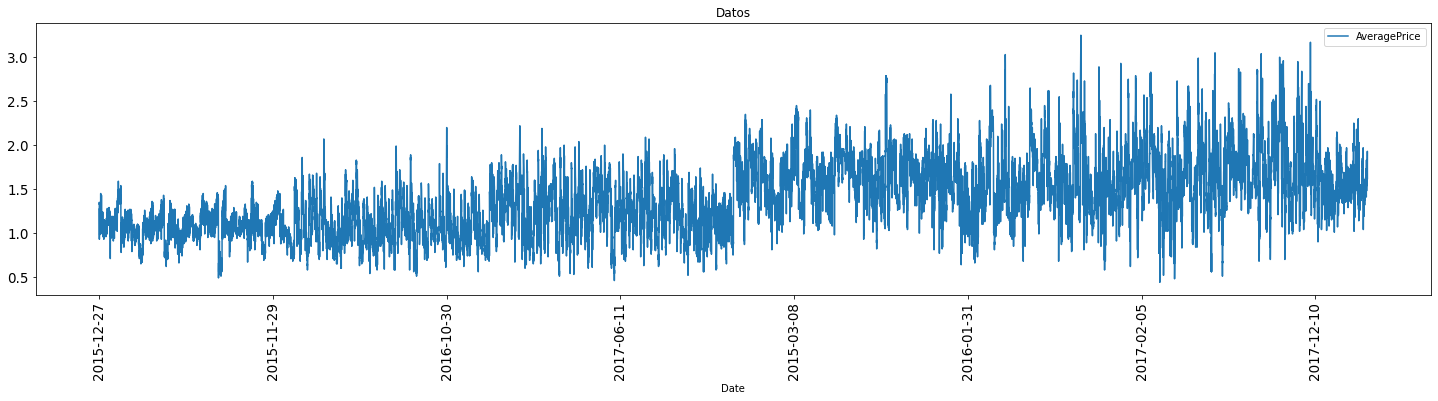

In [ ]:
datosCopia.plot("Date",title = "Datos", rot=90, figsize = (25, 5), fontsize = 13.5) # grafica la cantidad de datos que se encuentra en el dataframe

**Funciones para realizar graficas**

In [ ]:
def plot_data(X, y, model = None, ax = None, title=None):

    if ax is None:
      _, ax = plt.subplots(dpi = 110)

    if model is not None: 
      pred_fun = gen_pred_fun(model)
      plot_decision_region(X, pred_fun, ax)

    y_unique = np.unique(y)    
    df = pd.DataFrame({'x1': X[:,0], 'x2': X[:,1], 'Clases': y})
    sns.set_theme()
    sns.scatterplot(data = df, x = 'x1', y = 'x2', 
                    hue = 'Clases',style = 'Clases', ax = ax, palette = 'Set1').set_title(title)

In [ ]:
# Función para visualizar la superficie de decisión de un clasificador
def plot_decision_region(X, pred_fun, ax=None):
    min_x, max_x = np.min(X[:, 0]), np.max(X[:, 0])
    min_y, max_y = np.min(X[:, 1]), np.max(X[:, 1])
 
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05

    x_vals = np.linspace(min_x, max_x, 100)
    y_vals = np.linspace(min_y, max_y, 100)

    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape

    ZZ = np.zeros((grid_r, grid_c))

    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])    

    ax.contourf(XX, YY, ZZ, 100, cmap = plt.cm.coolwarm_r, vmin= -1, vmax=2, alpha = 0.75)    
    ax.set_xlabel("x")
    ax.set_ylabel("y")

In [ ]:
## Función para visualizar la curva de aprendizaje a partir 
# del error de entrenamiento y de generalización.
k_values = 50;
def plot_learning_curve(train_error, generalization_error):
  
  balance_point = np.array(generalization_error).argmin() + 1
  plt.figure(figsize = (8, 5), dpi = 105)

  plt.plot(range(1, k_values + 1), train_error, label="Entrenamiento")
  plt.plot(range(1, k_values + 1), generalization_error, label="Validación")
  plt.xticks(range(0, k_values + 1, 5))
  plt.xlabel("k-vecinos")
  plt.ylabel("Error")
  y_min, y_max = plt.gca().get_ylim() 
  plt.vlines(balance_point, y_min, y_max, colors = ['red'], linestyles = ['dashdot'])
  plt.ylim([y_min, y_max])
  plt.text(balance_point + 1, 0.165, 'Punto de balance')

In [ ]:
#Función para generar la función de predicción de un clasificador entrenado previamente.
def gen_pred_fun(clf):
    def pred_fun(x1, x2):
        x = np.array([[x1, x2]])
        return clf.predict(x)[0]
    return pred_fun

In [ ]:
def plot_prediction(params, ys, test_date_index): 
  
  train_data = datosFinal.loc[:test_date_index[0]]
  _y_test, _y_forward, _y_last = ys

  fig = go.Figure(layout = dict(
       title = f'<b>Precio del aguacate (Unidad) (2015-2018)</b> <br> {params}',
       dragmode= 'pan', width = 1200, height = 600))
  
  fig.add_trace(go.Scatter(x = train_data.index,  # Datos originales hasta la primer semana predicha. (fechas)
                          y = train_data.values, # Datos originales hasta la primer semana predicha. (precio)
                          mode = 'lines',
                          name = 'Valores de entrenamiento y pruebas'))

  #Gráfica de los valores de prueba reales.
  fig.add_trace(go.Scatter(x = test_date_index,
                          y = _y_test,
                          mode='lines+markers',
                          name='Valores reales (y)'))


  #Gráfica de los valores predichos a partir de las ventanas de X_test.
  fig.add_trace(go.Scatter(x = test_date_index, 
                          y = _y_forward,
                          mode = 'lines+markers',
                          name = 'Valores predichos a partir de datos reales'))

  #Gráfica de los valores predichos a partir de ventanas creadas proceduralmente.
  fig.add_trace(go.Scatter(x = test_date_index,
                          y = _y_last,
                          mode='lines+markers',
                          name='Valores predichos a partir de datos predichos'))

  fig.show(config = dict({'scrollZoom': True})) 

#**3 - Preparación de los datos**



##**3.1 - Selección de Datos finales**
Para desarrollar la prediccion se seleccionaran solo dos columnas del Dataframe:
* Date y AveragePrice

Los cuales corresponden a la fecha y el precio unitario del aguacate

##**3.2 - Limpieza de los datos**

In [ ]:
#Serie con el conjunto de datos
datosFinal = datosCopia.iloc[:,[0,1]]
datosFinal.set_index('Date', inplace=True)
datosFinal = pd.Series(data = datosFinal.iloc[:,0])
datosFinal.head()

Date
2015-12-27    1.33
2015-12-20    1.35
2015-12-13    0.93
2015-12-06    1.08
2015-11-29    1.28
Name: AveragePrice, dtype: float64

In [ ]:
datosFinal.head()

Date
2015-12-27    1.33
2015-12-20    1.35
2015-12-13    0.93
2015-12-06    1.08
2015-11-29    1.28
Name: AveragePrice, dtype: float64

##**Ventanas de tiempo**

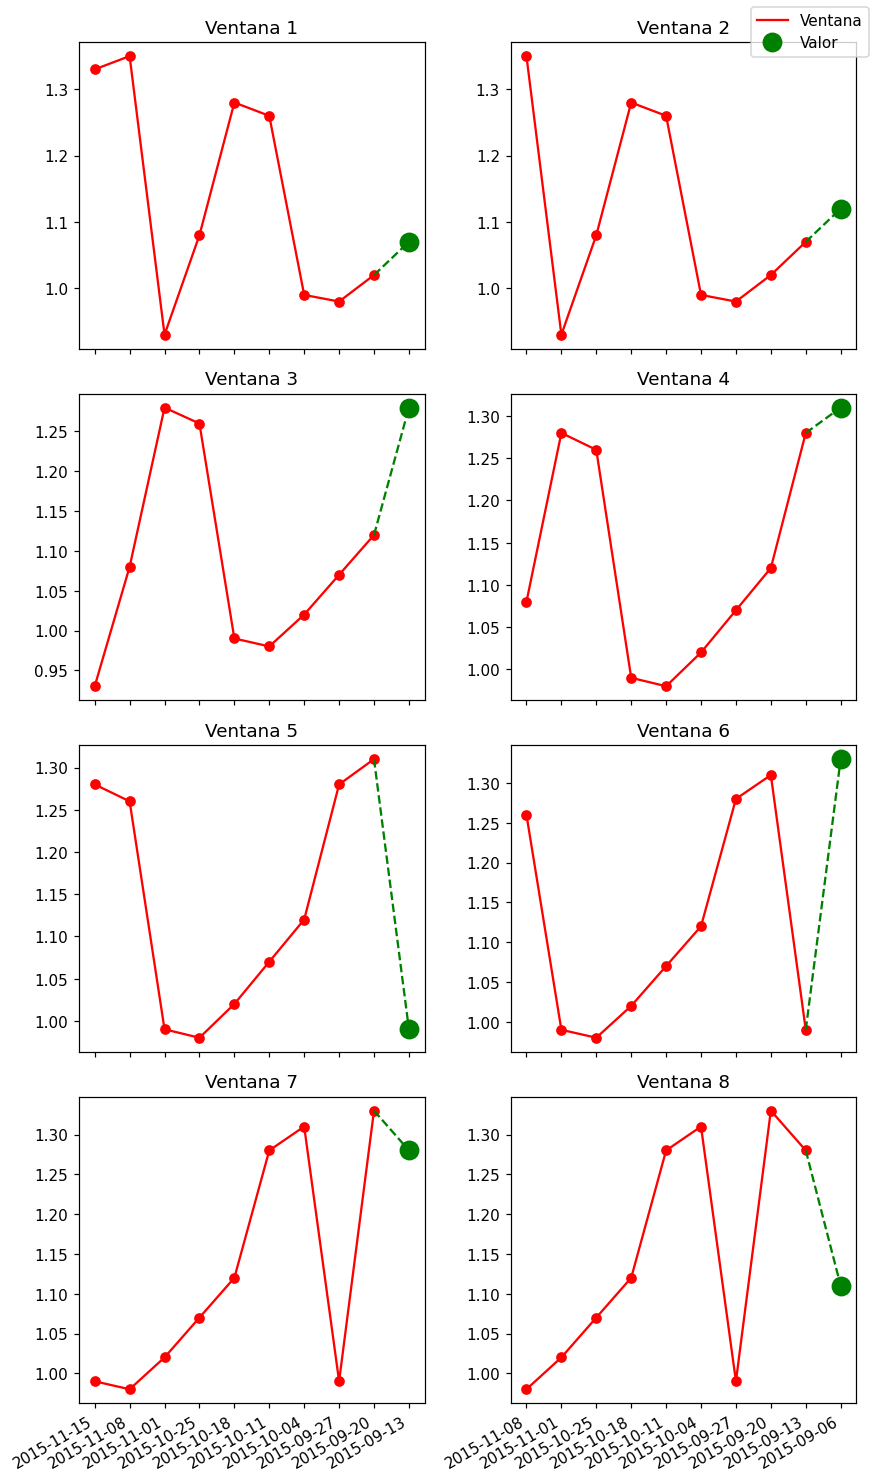

In [ ]:
#Funcion para las ventanas de tiempo
n = 9
k = 10
fig, axes = plt.subplots(nrows = n//2, ncols= 2,  figsize = (8, 1.5*n), dpi = 110)

for i, ax in enumerate(axes.flat):  
  data =  datosFinal.iloc[i: i + k]
  ax.set_title(f'Ventana {i + 1}')
  ax.plot(data.index[:-1], data.values[:-1], 'r')
  ax.plot(data.index[-1], data.values[-1], 'go', ms = 12)  
  ax.plot(data.index[:-1], data.values[:-1], 'ro')
  ax.plot(data.index[-2:], data.values[-2:], 'g--')
  fig.autofmt_xdate()
fig.tight_layout()

fig.legend(['Ventana', 'Valor']);

#**4 - Modelamiento**




##**4.1 - Selección de un modelo apropiado para el problema**
Para el desarrollo del modelo se selecciona un modelo de Series de tiempo (Regresion de series de tiempo con perceptrón multicapa).
Con este modelo se planea predecir los precios futuros del aguacate

##**4.2 - Construcción y entrenamiento de los modelos**

In [ ]:
k = 50 #Se selecciona el tamaño de la ventana, para el entrenamiento

In [ ]:
datosFinal = datosCopia.iloc[:,[0,1]]
datosFinal = datosFinal.sort_values('Date')
datosFinal.set_index('Date', inplace=True)
datosFinal = pd.Series(data = datosFinal.iloc[:,0])

In [ ]:
#Rango para las pruebas
data_train = datosFinal.loc[:'2015-12-27'] #Primer año - corresponde al comienzo
data_test = datosFinal.loc['2017-01-01':] #Dos ultimos años - corresponde al final 

data_train.index[-1], data_test.index[0] #Fechas de inicio de ambos conjuntos

('2015-12-27', '2017-01-01')

In [ ]:
#Funcion para obtener ventanas de tiempo
def sliding_time(ts, window_size=1):

  n = ts.shape[0] - window_size
  X = np.empty((n, window_size))
  y = np.empty(n)

  for i in range(window_size, ts.shape[0]):
    y[i - window_size] = ts[i]
    X[i - window_size, 0: window_size] = np.array(ts[i - window_size: i])
  return X, y 

In [ ]:
X_train, y_train = sliding_time(data_train.values, window_size=k) # Se crean las ventanas con sus valores, para el entrenamiento y validación

In [ ]:
print(f"Número de ejemplos de entrenamiento:{X_train.shape[0]} (Ventana de tamaño {X_train.shape[1]})")
print(f"Número de valores a predecir:{y_train.shape[0]}")

Número de ejemplos de entrenamiento:5565 (Ventana de tamaño 50)
Número de valores a predecir:5565


In [ ]:
# Creamos las ventanas y sus valores a predecir para entrenamiento y validación.
X_test, y_test = sliding_time(data_test.values, window_size = k)

In [ ]:
print(f"Número de ejemplos de entrenamiento:{X_test.shape[0]} (Ventana de tamaño {X_test.shape[1]})")
print(f"Número de valores a predecir:{y_test.shape[0]}")

Número de ejemplos de entrenamiento:6968 (Ventana de tamaño 50)
Número de valores a predecir:6968


In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.75,1.49,1.68,1.52,1.64,0.75,0.85,1.50,1.00,0.80,...,1.11,0.77,1.02,1.48,2.01,0.97,0.97,1.30,0.88,1.93
1,1.49,1.68,1.52,1.64,0.75,0.85,1.50,1.00,0.80,0.74,...,0.77,1.02,1.48,2.01,0.97,0.97,1.30,0.88,1.93,1.01
2,1.68,1.52,1.64,0.75,0.85,1.50,1.00,0.80,0.74,1.82,...,1.02,1.48,2.01,0.97,0.97,1.30,0.88,1.93,1.01,0.94
3,1.52,1.64,0.75,0.85,1.50,1.00,0.80,0.74,1.82,1.01,...,1.48,2.01,0.97,0.97,1.30,0.88,1.93,1.01,0.94,1.33
4,1.64,0.75,0.85,1.50,1.00,0.80,0.74,1.82,1.01,1.80,...,2.01,0.97,0.97,1.30,0.88,1.93,1.01,0.94,1.33,1.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5560,0.99,1.05,0.96,1.07,1.17,1.20,1.21,0.99,1.25,0.49,...,1.35,0.87,1.71,0.78,0.93,1.16,1.01,1.27,1.08,0.98
5561,1.05,0.96,1.07,1.17,1.20,1.21,0.99,1.25,0.49,0.92,...,0.87,1.71,0.78,0.93,1.16,1.01,1.27,1.08,0.98,0.80
5562,0.96,1.07,1.17,1.20,1.21,0.99,1.25,0.49,0.92,1.54,...,1.71,0.78,0.93,1.16,1.01,1.27,1.08,0.98,0.80,0.99
5563,1.07,1.17,1.20,1.21,0.99,1.25,0.49,0.92,1.54,1.52,...,0.78,0.93,1.16,1.01,1.27,1.08,0.98,0.80,0.99,1.36


In [ ]:
pd.Series(y_train)

0       1.01
1       0.94
2       1.33
3       1.35
4       0.71
        ... 
5560    0.80
5561    0.99
5562    1.36
5563    1.13
5564    0.96
Length: 5565, dtype: float64

##**Partición de datos**
Para realizar la partición de los datos para el entrenamiento es necesario utilizar la función TimeSeriesSplit de Scikit-Learn

In [ ]:
#Selección de los datos en series de tiempo
from sklearn.model_selection import TimeSeriesSplit

#Definimos el número de splits para realizar cross-validation
tsp = TimeSeriesSplit(n_splits = 3)

In [ ]:
for i, (train_index, test_index) in enumerate(tsp.split(X_train, y_train)):

  print(f'-------------------- Pliegue {i + 1} --------------------')
  print("\tPartición de entrenamiento")
  print(f'\t\tTamaño de la partición: {train_index.shape}')
  print(f'\t\tRango de valores: {train_index[0]}-{train_index[-1]}\n')

  print("\tPartición de validación")
  print(f'\t\tTamaño de la partición: {test_index.shape}')
  print(f'\t\tRango de valores: {test_index[0]}-{test_index[-1]}\n')  

-------------------- Pliegue 1 --------------------
	Partición de entrenamiento
		Tamaño de la partición: (1392,)
		Rango de valores: 0-1391

	Partición de validación
		Tamaño de la partición: (1391,)
		Rango de valores: 1392-2782

-------------------- Pliegue 2 --------------------
	Partición de entrenamiento
		Tamaño de la partición: (2783,)
		Rango de valores: 0-2782

	Partición de validación
		Tamaño de la partición: (1391,)
		Rango de valores: 2783-4173

-------------------- Pliegue 3 --------------------
	Partición de entrenamiento
		Tamaño de la partición: (4174,)
		Rango de valores: 0-4173

	Partición de validación
		Tamaño de la partición: (1391,)
		Rango de valores: 4174-5564



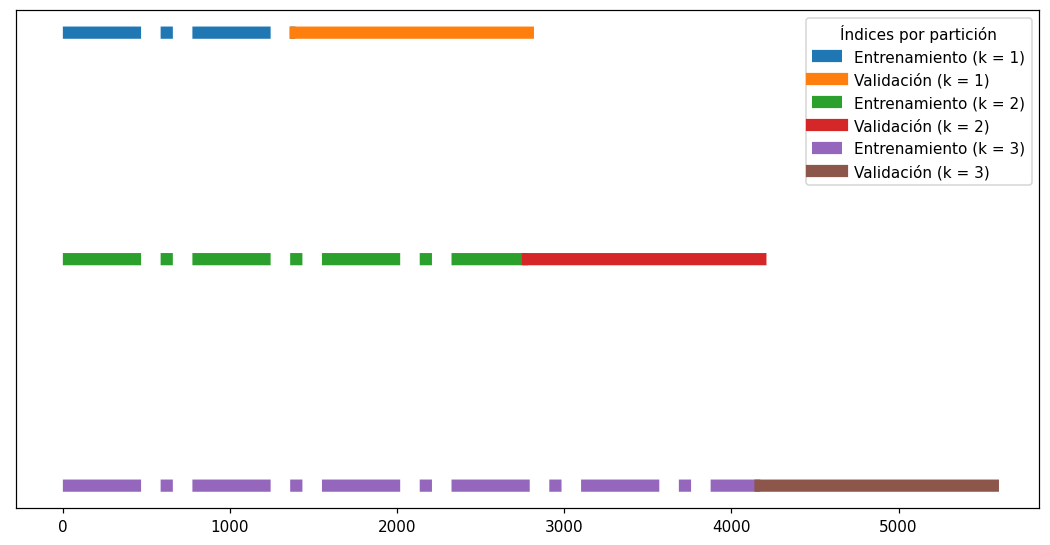

In [ ]:
i = 0
fig = plt.figure(figsize = (12,6), dpi = 110)
plt.set_cmap('Paired')

tsp_indexes = [(train_index, test_index) for (train_index, test_index) in tsp.split(X_train, y_train)]

for train_index, test_index in tsp_indexes:
  plt.plot(train_index, 
           np.full(len(train_index), 1-i*0.001),
           lw = 8, 
           ls= '-.', 
           label = f'Entrenamiento (k = {i + 1})')
  
  plt.plot(test_index, 
           np.full(len(test_index), 1-i*0.001), 
           lw = 8, 
           ls= '-', 
           label = f'Validación (k = {i + 1})')
  i+=1
fig.get_axes()[0].get_yaxis().set_visible(False)
plt.legend(ncol=1, title = 'Índices por partición', );

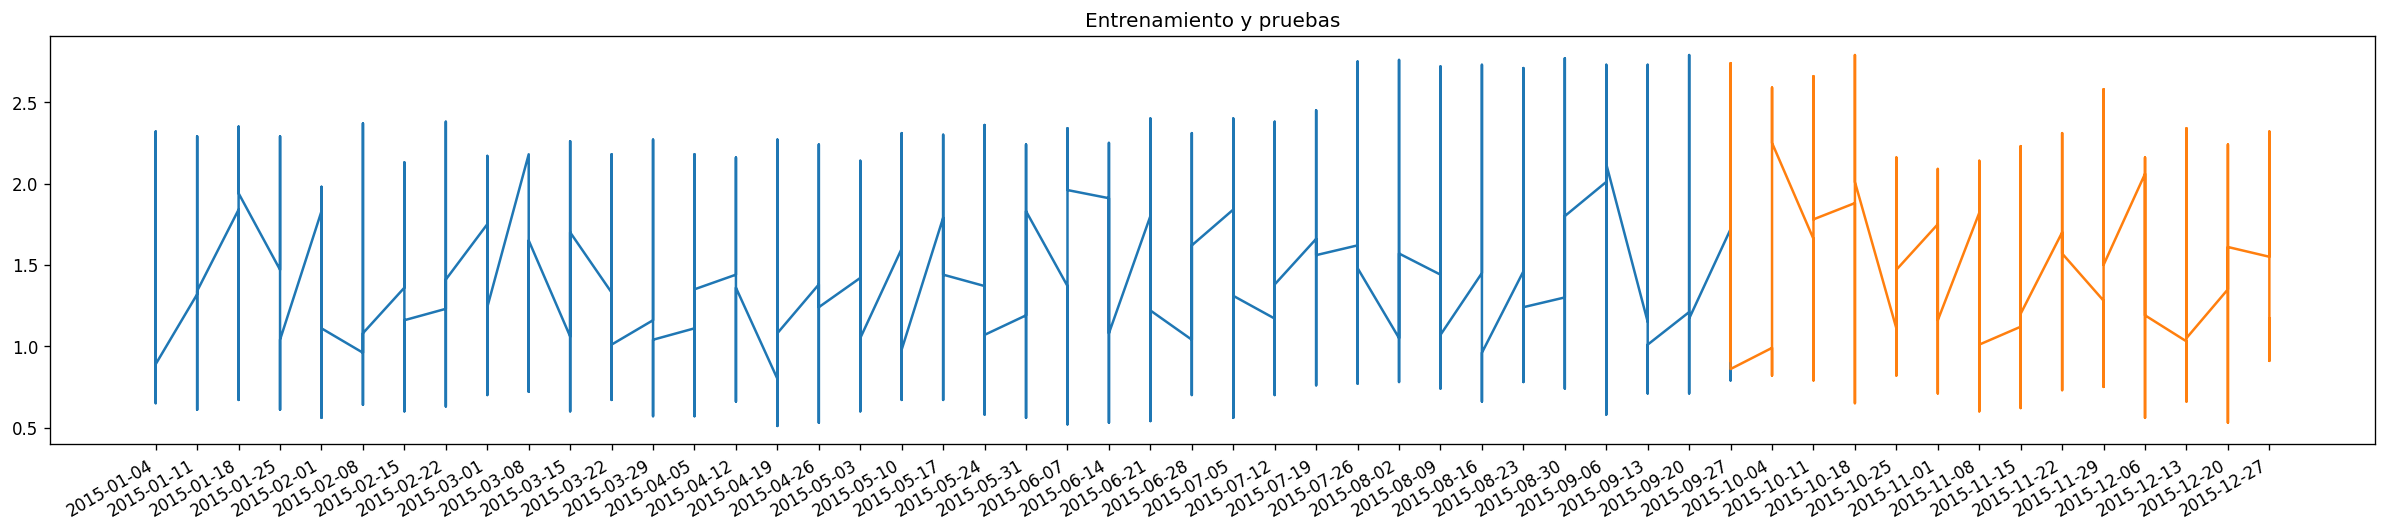

In [ ]:
train_index, test_index = tsp_indexes[-1]

fig = plt.figure(dpi=120, figsize = (25, 5))
plt.plot(datosFinal[train_index].index, datosFinal[train_index].values, label = "Entrenamiento (y)")
plt.plot(datosFinal[test_index].index, datosFinal[test_index].values, label = "Prueba (y)")

plt.title("Entrenamiento y pruebas")
fig.autofmt_xdate()

##**Regresión de series de tiempo con perceptrón multicapa **
Se realiza la regresion con esta herramienta, para predecir el valor de las serie. Se utilizara la función MPLRegressor que viene precargada en scikit-learn

In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(solver = 'lbfgs',
                    activation = 'relu',
                    hidden_layer_sizes = (120, 60, 30),
                    max_iter = 200,
                    n_iter_no_change = 50,
                    validation_fraction = 0.2,
                    random_state = 1234)

In [ ]:
model.fit(X_train, y_train) #Entrenamiento del modelo

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(hidden_layer_sizes=(120, 60, 30), n_iter_no_change=50,
             random_state=1234, solver='lbfgs', validation_fraction=0.2)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error 

y_pred = model.predict(X_test)

print(f"Test Mean Squared Error: \t{mean_squared_error(y_test, y_pred):.4f}")
print(f"Test Mean Absolute Error: \t{mean_absolute_error(y_test, y_pred):.4f}")
print(f"Test Mean squared log error: \t{mean_squared_log_error(y_test, y_pred):.4f}")

Test Mean Squared Error: 	0.1820
Test Mean Absolute Error: 	0.3318
Test Mean squared log error: 	0.0287


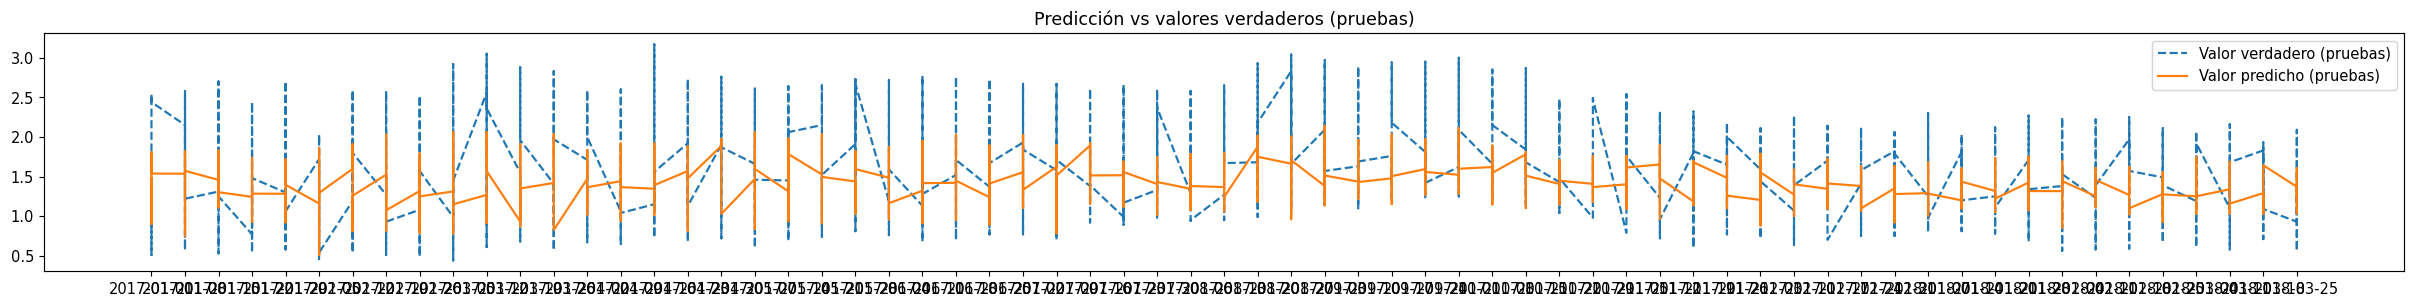

In [ ]:
x = data_test.index[k:]

plt.figure(figsize=(29,3), dpi = 105)
plt.plot(x, y_test, ls = "--", label="Valor verdadero (pruebas)")
plt.plot(x, y_pred, ls = '-', label="Valor predicho (pruebas)")
plt.title("Predicción vs valores verdaderos (pruebas)")
plt.legend();

##**Validación cruzada con series de tiempo**


In [ ]:
params = {
    'hidden_layer_sizes': [(10,),(20,), (40,), (80,)],
    'activation' : ['logistic', 'relu']
}

In [ ]:
from sklearn.model_selection import GridSearchCV

tsp = TimeSeriesSplit(n_splits = 5)

gsearch = GridSearchCV(estimator = MLPRegressor(solver = 'lbfgs',
                                                random_state = 1234,
                                                max_iter = 2000,
                                                n_iter_no_change = 50,
                                                validation_fraction = 0.2),
                       cv = tsp,
                       param_grid = params,
                       verbose = 3)

gsearch.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,);, score=-1.211 total time=   3.0s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,);, score=-1.834 total time=   3.3s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,);, score=-0.043 total time=   0.2s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(10,);, score=0.008 total time=   0.3s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,);, score=-0.012 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(20,);, score=-3.290 total time=   6.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(20,);, score=-2.357 total time=   4.6s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(20,);, score=-1.211 total time=   6.4s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(20,);, score=-1.486 total time=   8.2s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(20,);, score=-0.009 total time=   0.2s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(40,);, score=-3.200 total time=   3.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(40,);, score=-2.438 total time=   7.8s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(40,);, score=-0.043 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, hidden_layer_sizes=(40,);, score=-1.672 total time=  14.3s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(40,);, score=-0.009 total time=   0.3s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(80,);, score=-2.225 total time=   4.8s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(80,);, score=-0.040 total time=   0.2s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(80,);, score=-0.043 total time=   0.2s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(80,);, score=0.005 total time=   0.3s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(80,);, score=-0.009 total time=   0.6s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10,);, score=-0.268 total time=   0.7s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10,);, score=-0.218 total time=   1.4s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10,);, score=-0.053 total time=   0.6s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10,);, score=-0.102 total time=  

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=(20,);, score=-0.652 total time=   2.9s
[CV 3/5] END activation=relu, hidden_layer_sizes=(20,);, score=-0.042 total time=   0.4s
[CV 4/5] END activation=relu, hidden_layer_sizes=(20,);, score=0.005 total time=   0.6s
[CV 5/5] END activation=relu, hidden_layer_sizes=(20,);, score=-0.084 total time=   6.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, hidden_layer_sizes=(40,);, score=-1.487 total time=   2.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=(40,);, score=-0.572 total time=   4.2s
[CV 3/5] END activation=relu, hidden_layer_sizes=(40,);, score=-0.618 total time=   5.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=(40,);, score=-0.437 total time=   7.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(40,);, score=-0.226 total time=  11.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, hidden_layer_sizes=(80,);, score=-2.600 total time=   4.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=(80,);, score=-1.799 total time=   7.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=(80,);, score=-1.065 total time=  14.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=(80,);, score=-1.100 total time=  15.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(80,);, score=-0.834 total time=  18.7s


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=MLPRegressor(max_iter=2000, n_iter_no_change=50,
                                    random_state=1234, solver='lbfgs',
                                    validation_fraction=0.2),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(10,), (20,), (40,), (80,)]},
             verbose=3)

##**Evaluación del modelo**
Las líneas generadas en la visualización tienen el siguiente significado:
  * **Valores de entrenamiento y pruebas**: La primera ventana de tiempo
      (<font color="blue"><b>en azul</b></font>) corresponde a los datos que fueron usados para entrenar y validar el desempeño del modelo. A partir de su último valor se realizan las predicciones correspondientes.
  * **Valores reales**: Esta línea (<font color="red"><b>en rojo</b></font>) corresponde a los valores reales de la ventana de tiempo final en el conjunto de datos original. Se visualiza para realizar una comparación gráfica con los valores predichos por el modelo.
  * **Valores predichos a partir de datos reales**: Esta línea (<font color="green"><b>en verde</b></font>) corresponde a los valores predichos por el modelo a partir de la ventana previa de valores reales, aunque su final no coincida con el valor predicho con la ventana inmediatamente anterior.
  * **Valores predichos a partir de datos predichos**: Esta línea (<font color="BlueViolet"><b>en azul</b></font>) corresponde a los valores predichos por el modelo a partir de la ventana previa de valores construida a partir de predicciones continuas. Al inicio se realiza una predicción con los valores reales del final de la primera ventana de tiempo y se concatena el valor predicho al final de la nueva ventana usada para predecir. Gracias a esta configuración se podría realizar teóricamente una lista de predicciones sin límite.

In [ ]:
pd.DataFrame(gsearch.cv_results_).nlargest(10, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,1.061478,0.809439,0.000749,0.000011,relu,"(10,)","{'activation': 'relu', 'hidden_layer_sizes': (...",-0.267812,-0.218015,-0.053131,-0.101508,-0.009215,-0.129936,0.098029,1
5,2.343266,2.108600,0.000828,0.000061,relu,"(20,)","{'activation': 'relu', 'hidden_layer_sizes': (...",-0.800029,-0.651505,-0.041508,0.005213,-0.084271,-0.314420,0.340311,2
3,1.224773,1.803447,0.004468,0.003223,logistic,"(80,)","{'activation': 'logistic', 'hidden_layer_sizes...",-2.224736,-0.039538,-0.043320,0.005097,-0.008671,-0.462234,0.881441,3
0,1.443932,1.406103,0.001808,0.001477,logistic,"(10,)","{'activation': 'logistic', 'hidden_layer_sizes...",-1.210889,-1.834241,-0.042924,0.007917,-0.012054,-0.618438,0.764253,4
6,6.322482,2.965592,0.001460,0.000225,relu,"(40,)","{'activation': 'relu', 'hidden_layer_sizes': (...",-1.486716,-0.571734,-0.617706,-0.437059,-0.226188,-0.667880,0.431422,5
2,5.142034,5.359638,0.001895,0.000193,logistic,"(40,)","{'activation': 'logistic', 'hidden_layer_sizes...",-3.200207,-2.438464,-0.042686,-1.672255,-0.009011,-1.472525,1.276254,6
7,12.160746,5.291176,0.001727,0.000209,relu,"(80,)","{'activation': 'relu', 'hidden_layer_sizes': (...",-2.599671,-1.799308,-1.064517,-1.099678,-0.833594,-1.479354,0.646642,7
1,5.242040,2.779457,0.001433,0.000227,logistic,"(20,)","{'activation': 'logistic', 'hidden_layer_sizes...",-3.289630,-2.356873,-1.211445,-1.485935,-0.008569,-1.670490,1.104491,8


In [ ]:
X_last = X_test[:1]

# Listas con los datos en y, empezando desde el primer valor de pruebas.
y_last = [] 
y_forward = []

for i in range(len(X_test)):  
  # Valores predichos a partir de datos reales (X_test)
  y_pred_forward = gsearch.predict(X_test[i: i + 1]) 
  y_forward.append(y_pred_forward[0])  

  # Valores predichos a partir de datos predichos y retroalimentados.
  y_pred_last = gsearch.predict(X_last)  # Se predice el valor siguiente a partir de datos predichos previamente.
  y_last.append(y_pred_last[0])          # Guardamos el valor predicho.

  # Creación de la nueva ventana añadiendo la última predicción.
  X_last = np.roll(X_last, -1)           # Desplazamos todos los valores hacia la izquierda con np.roll
  X_last[0,-1] = y_pred_last             # Guardamos el valor predicho en la última posición del arreglo.

#Gráficamos las 2 predicciones distintas en comparación con los valores reales.

datosFinal = datosCopia.iloc[:,[0,1]]
datosFinal = datosFinal.sort_values('Date')
datosFinal.set_index('Date', inplace = True)
datosFinal = pd.Series(data = datosFinal.iloc[:,0])
test_date_index = data_test.index[k:]

plot_prediction(gsearch.best_params_, 
                (y_test, y_forward, y_last),
                 test_date_index
                )

#**5 - Evaluacion**



##**5.1 - Análisis de los resultados**

* "Los valores predichos a partir de datos predichos", se salen un poco de lo esperado, ya que se esperaba que siguiera la tendencia de los otros valores.

* "Los valores predichos a partir de datos reales", se adaptan un poco mejor sin embargo aún falta mucho para que se adapte a los datos de entrenamiento y a los datos reales ya que se comporta de manera similar a estos.

*	Es necesario probar otros métodos u realizar unas condiciones diferentes que generen un modelo más adecuado para el propósito que se desea lograr con esta información.

* No es posible concluir algo concreto con tanta información, sería prudente analizarlos por secciones ya sea separándolos por años u otra forma.